In [1]:
# scientific python imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# file management imports
import os
import boto3  # <- for downloading DOE Data Prize files from OEDI S3 bucket

# SDT imports
from solardatatools import DataHandler

# Timing
from time import time
notebook_start = time()

# Suppress warnings from SDT v1.2 (not needed for latest version)
import warnings
warnings.filterwarnings("ignore")

## Data access and loading

In [58]:
test = pd.read_csv("2105_inv09_data.csv", parse_dates=True)
#test = pd.read_csv("../../../../../PVInsight/solardatatools_system2105/2105.csv", parse_dates=True)

from datetime import timedelta
test['measured_on'] = pd.to_datetime(test['measured_on'])

test["measured_on"] = test["measured_on"] - timedelta(hours=10) # make it UTC

In [59]:
test = test.set_index("measured_on")

In [60]:
df_2105 = test

In [61]:
df_2105 = df_2105.resample('5min').mean()

In [62]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [63]:
# col_ix = 0
# print(df_2105.columns[col_ix])
# dh_2105 = DataHandler(df_2105)
# dh_2105.run_pipeline(power_col=df_2105.columns[col_ix])

dh_2105 = DataHandler(df_2105)
dh_2105.run_pipeline(power_col='inv_string09_ac_output_(kwh)_inv_150212', correct_tz=True)


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:08<00:00,  1.18s/it]

[22.75        0.08333333  3.5         6.66666667  2.08333333  0.08333333
  0.25       21.58333333  1.75        1.25        0.08333333  0.08333333
  0.08333333  2.91666667  0.66666667  1.25        1.75       23.75
  1.          0.25        0.66666667  0.58333333  0.66666667  0.33333333
  0.08333333 23.33333333  0.41666667  2.41666667  0.16666667  0.16666667
  2.08333333  3.          2.66666667  1.25        0.66666667  1.25
  1.33333333  4.          0.08333333  2.41666667]
[22.91666667 22.33333333 22.         22.         23.75       23.83333333
 23.25        7.91666667  8.08333333  8.08333333  8.58333333 23.83333333
 22.91666667  7.41666667  7.41666667  7.33333333  7.41666667  7.08333333
  7.33333333  7.25        7.5         7.58333333  8.33333333  7.83333333
  7.41666667  7.41666667  7.41666667  7.08333333  7.41666667  7.5
  7.5         7.75        8.08333333  7.75        7.91666667  8.08333333
  7.5         8.16666667  8.16666667  8.33333333  8.33333333 23.83333333
  8.83333333  7.9166

In [64]:
dh_2105.report(return_values=True)


-----------------
DATA SET REPORT
-----------------
length               4.41 years
capacity estimate    41.87 kW
data sampling        5 minutes
quality score        0.97
clearness score      0.12
inverter clipping    True
clipped fraction     0.03
capacity changes     True
data quality warning True
time shift errors    False
time zone errors     True
            


{'length': 4.410958904109589,
 'capacity': np.float64(41.874),
 'sampling': 5,
 'quality score': np.float64(0.9683229813664597),
 'clearness score': np.float64(0.12360248447204969),
 'inverter clipping': True,
 'clipped fraction': np.float64(0.02608695652173913),
 'capacity change': True,
 'data quality warning': np.True_,
 'time shift correction': False,
 'time zone correction': 7}

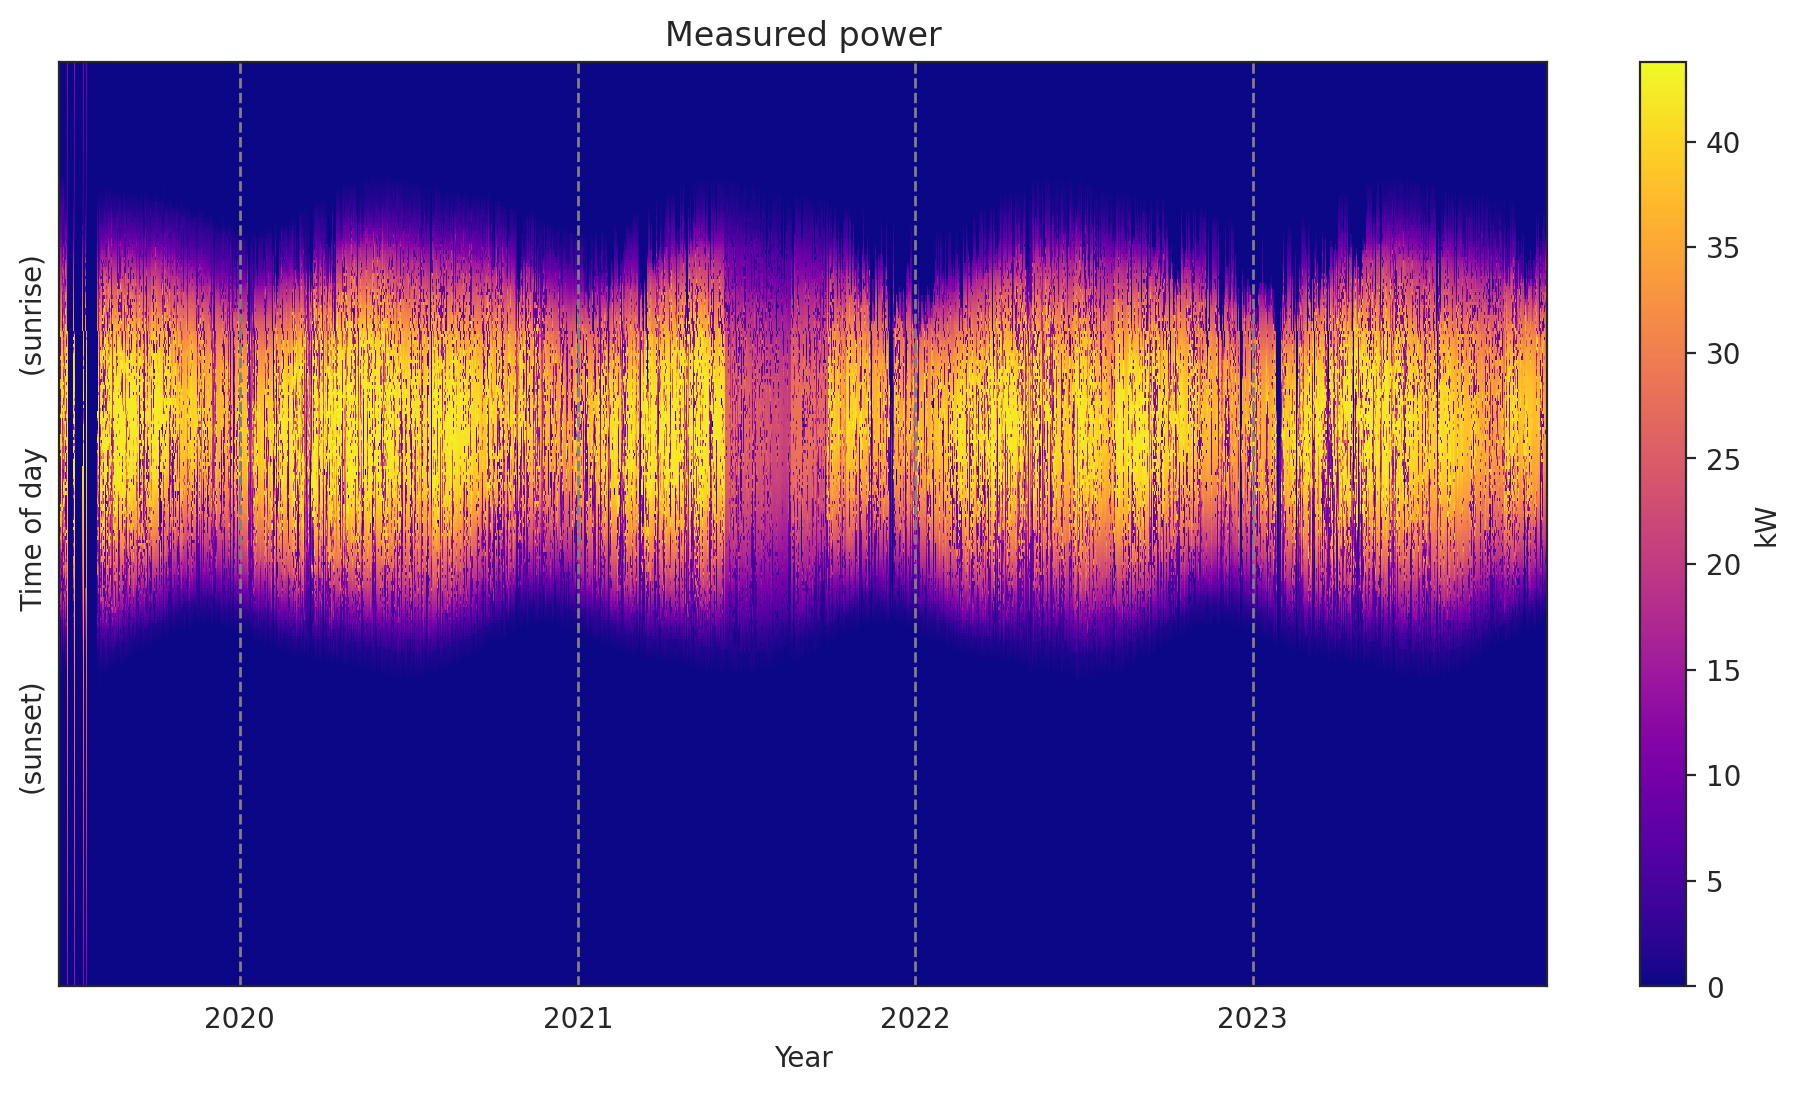

In [65]:
dh_2105.plot_heatmap('filled');

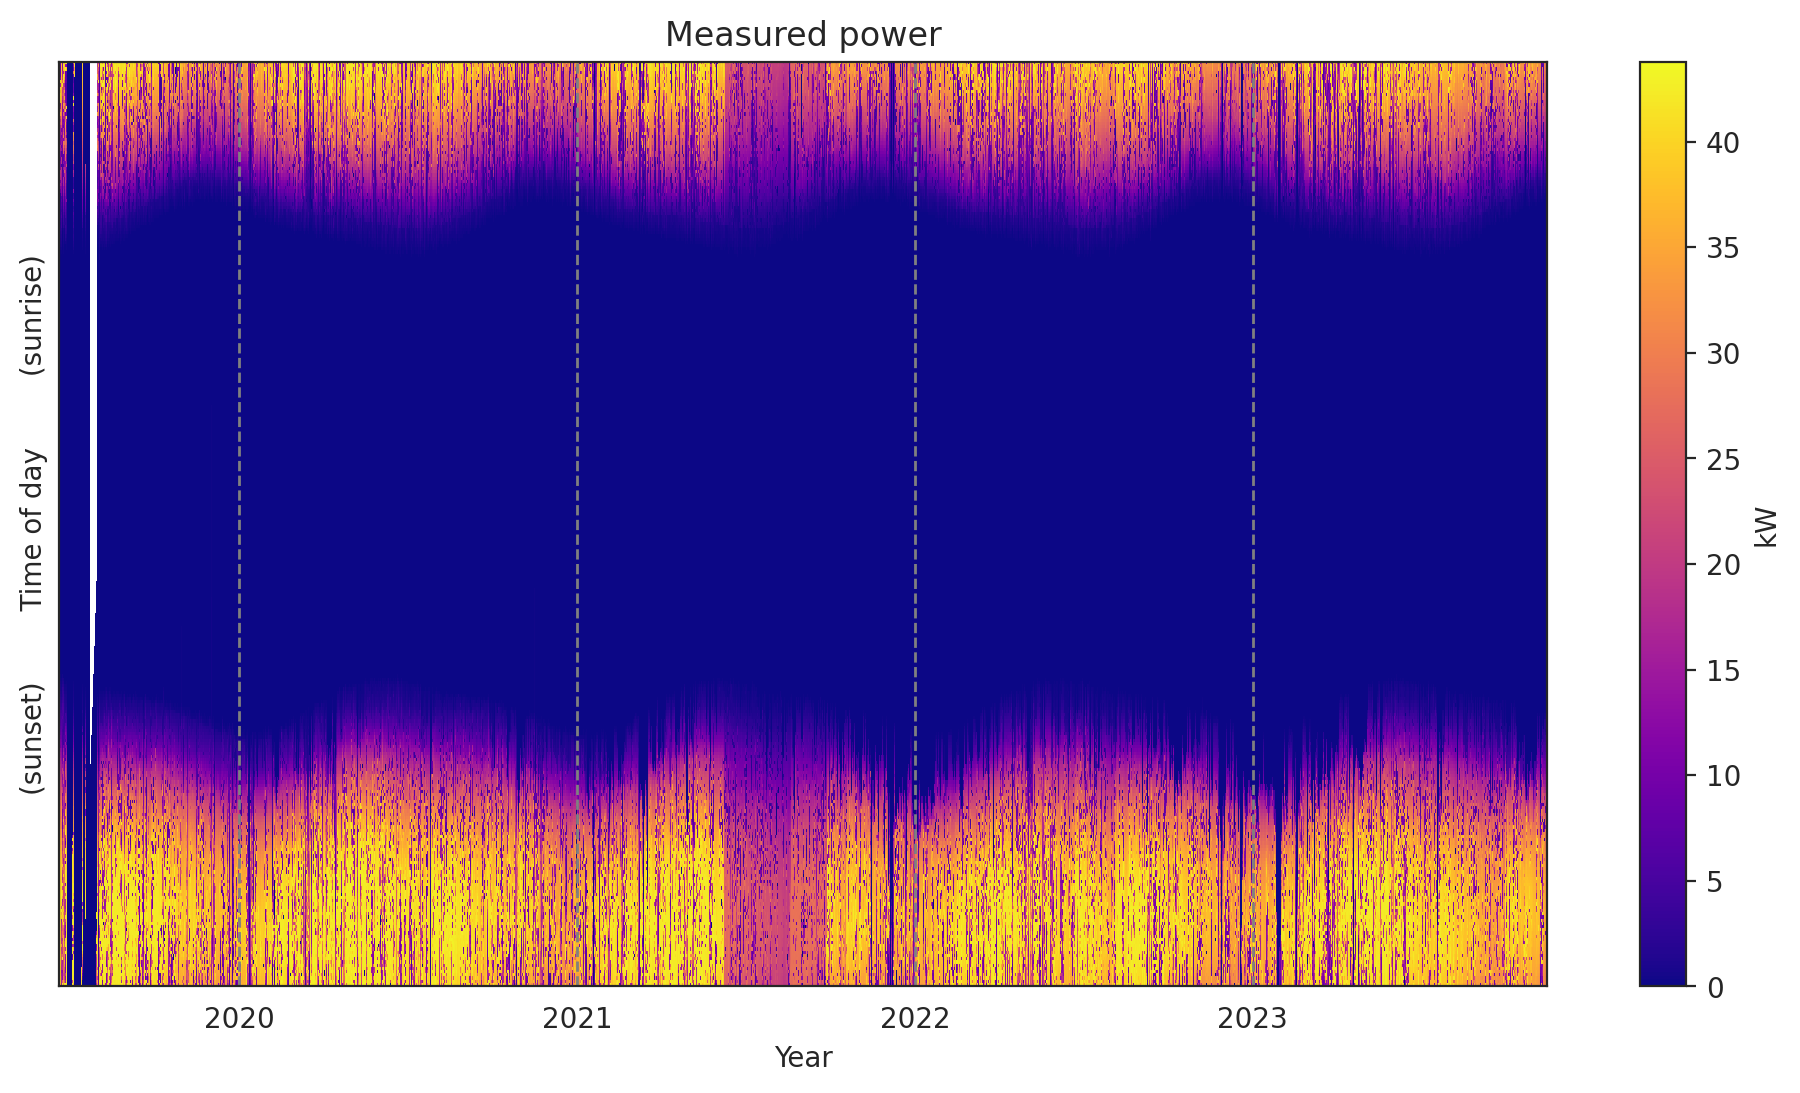

In [49]:
dh_2105.plot_heatmap('filled');

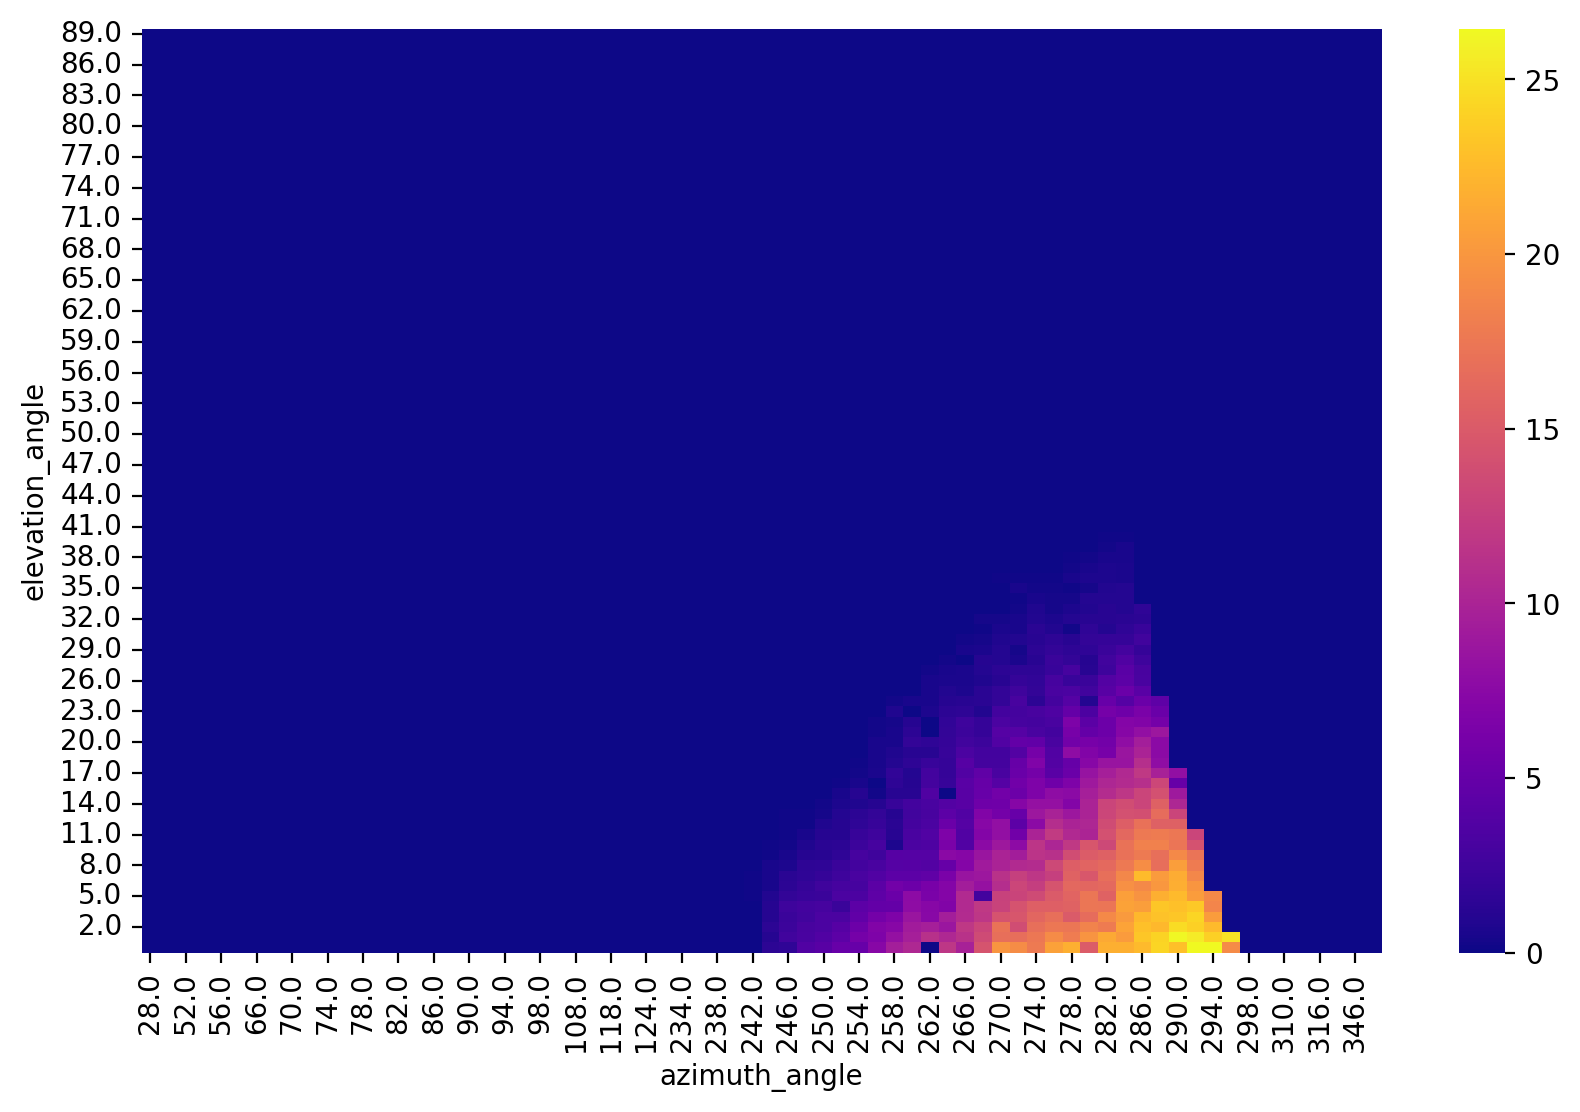

In [14]:
dh_2105.plot_polar_transform(lat=20.884134,
                             lon=-156.340543,
                             tz_offset=-10);

In [25]:
dh_2105.run_loss_factor_analysis()


            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


10it [00:36,  4.07s/it]

P50, P02.5, P97.5: -2.046, -2.609, -1.764
changes: -7.290e-02, -3.839e-02, 0.000e+00


20it [01:17,  4.13s/it]

P50, P02.5, P97.5: -2.046, -2.609, -1.626
changes: -2.540e-02, 0.000e+00, 0.000e+00


30it [01:58,  4.07s/it]

P50, P02.5, P97.5: -1.926, -2.607, -1.632
changes: 3.143e-02, 9.597e-04, -2.004e-03


40it [02:39,  4.20s/it]

P50, P02.5, P97.5: -1.926, -2.597, -1.608
changes: 2.728e-02, 9.597e-04, -6.810e-04


50it [03:21,  4.11s/it]

P50, P02.5, P97.5: -1.980, -2.587, -1.614
changes: 4.150e-03, 9.597e-04, -6.810e-04


51it [03:29,  4.11s/it]


Performing loss factor analysis...

                    ***************************************
                    * Solar Data Tools Loss Factor Report *
                    ***************************************

                    degradation rate [%/yr]:                    -2.000
                    deg. rate 95% confidence:          [-2.586, -1.616]
                    total energy loss [kWh]:                 -124153.8
                    bulk deg. energy loss (gain) [kWh]:       -18502.9
                    soiling energy loss [kWh]:                -14612.2
                    capacity change energy loss [kWh]:        -11699.1
                    weather energy loss [kWh]:                -64220.1
                    system outage loss [kWh]:                 -15119.6
                    


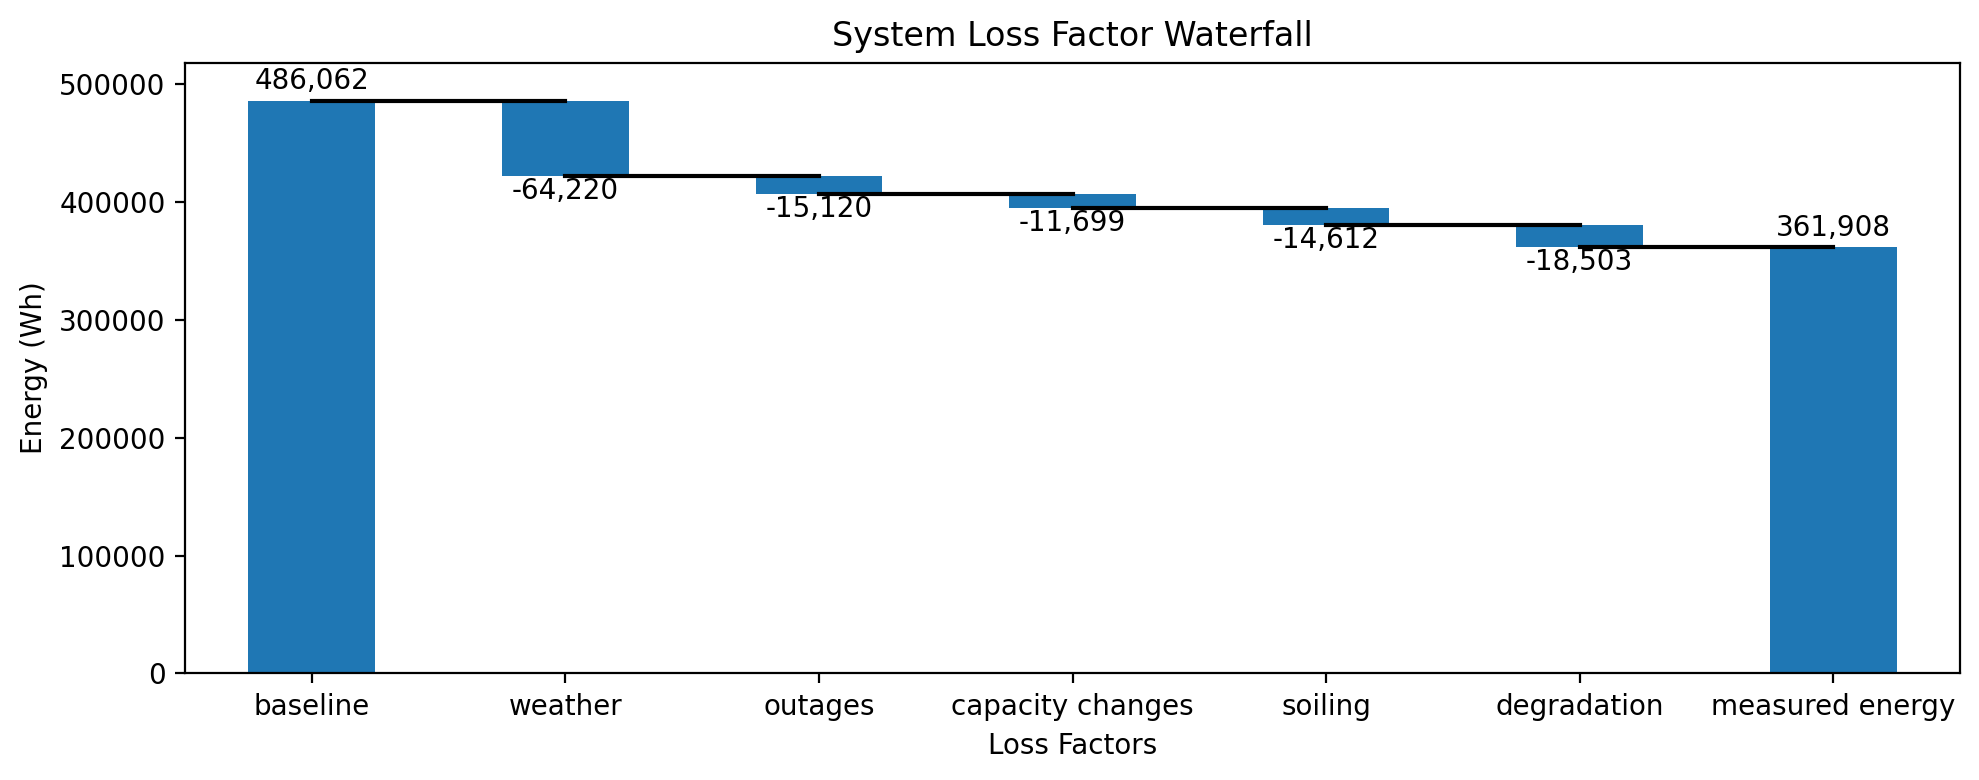

In [26]:
dh_2105.loss_analysis.plot_waterfall();

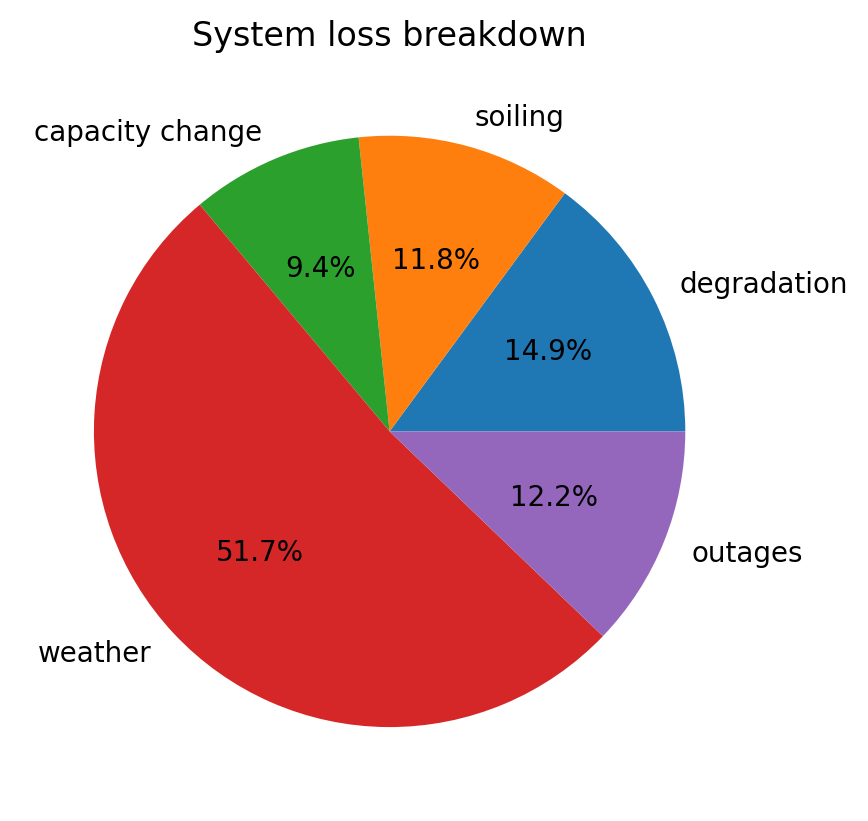

In [27]:
dh_2105.loss_analysis.plot_pie();

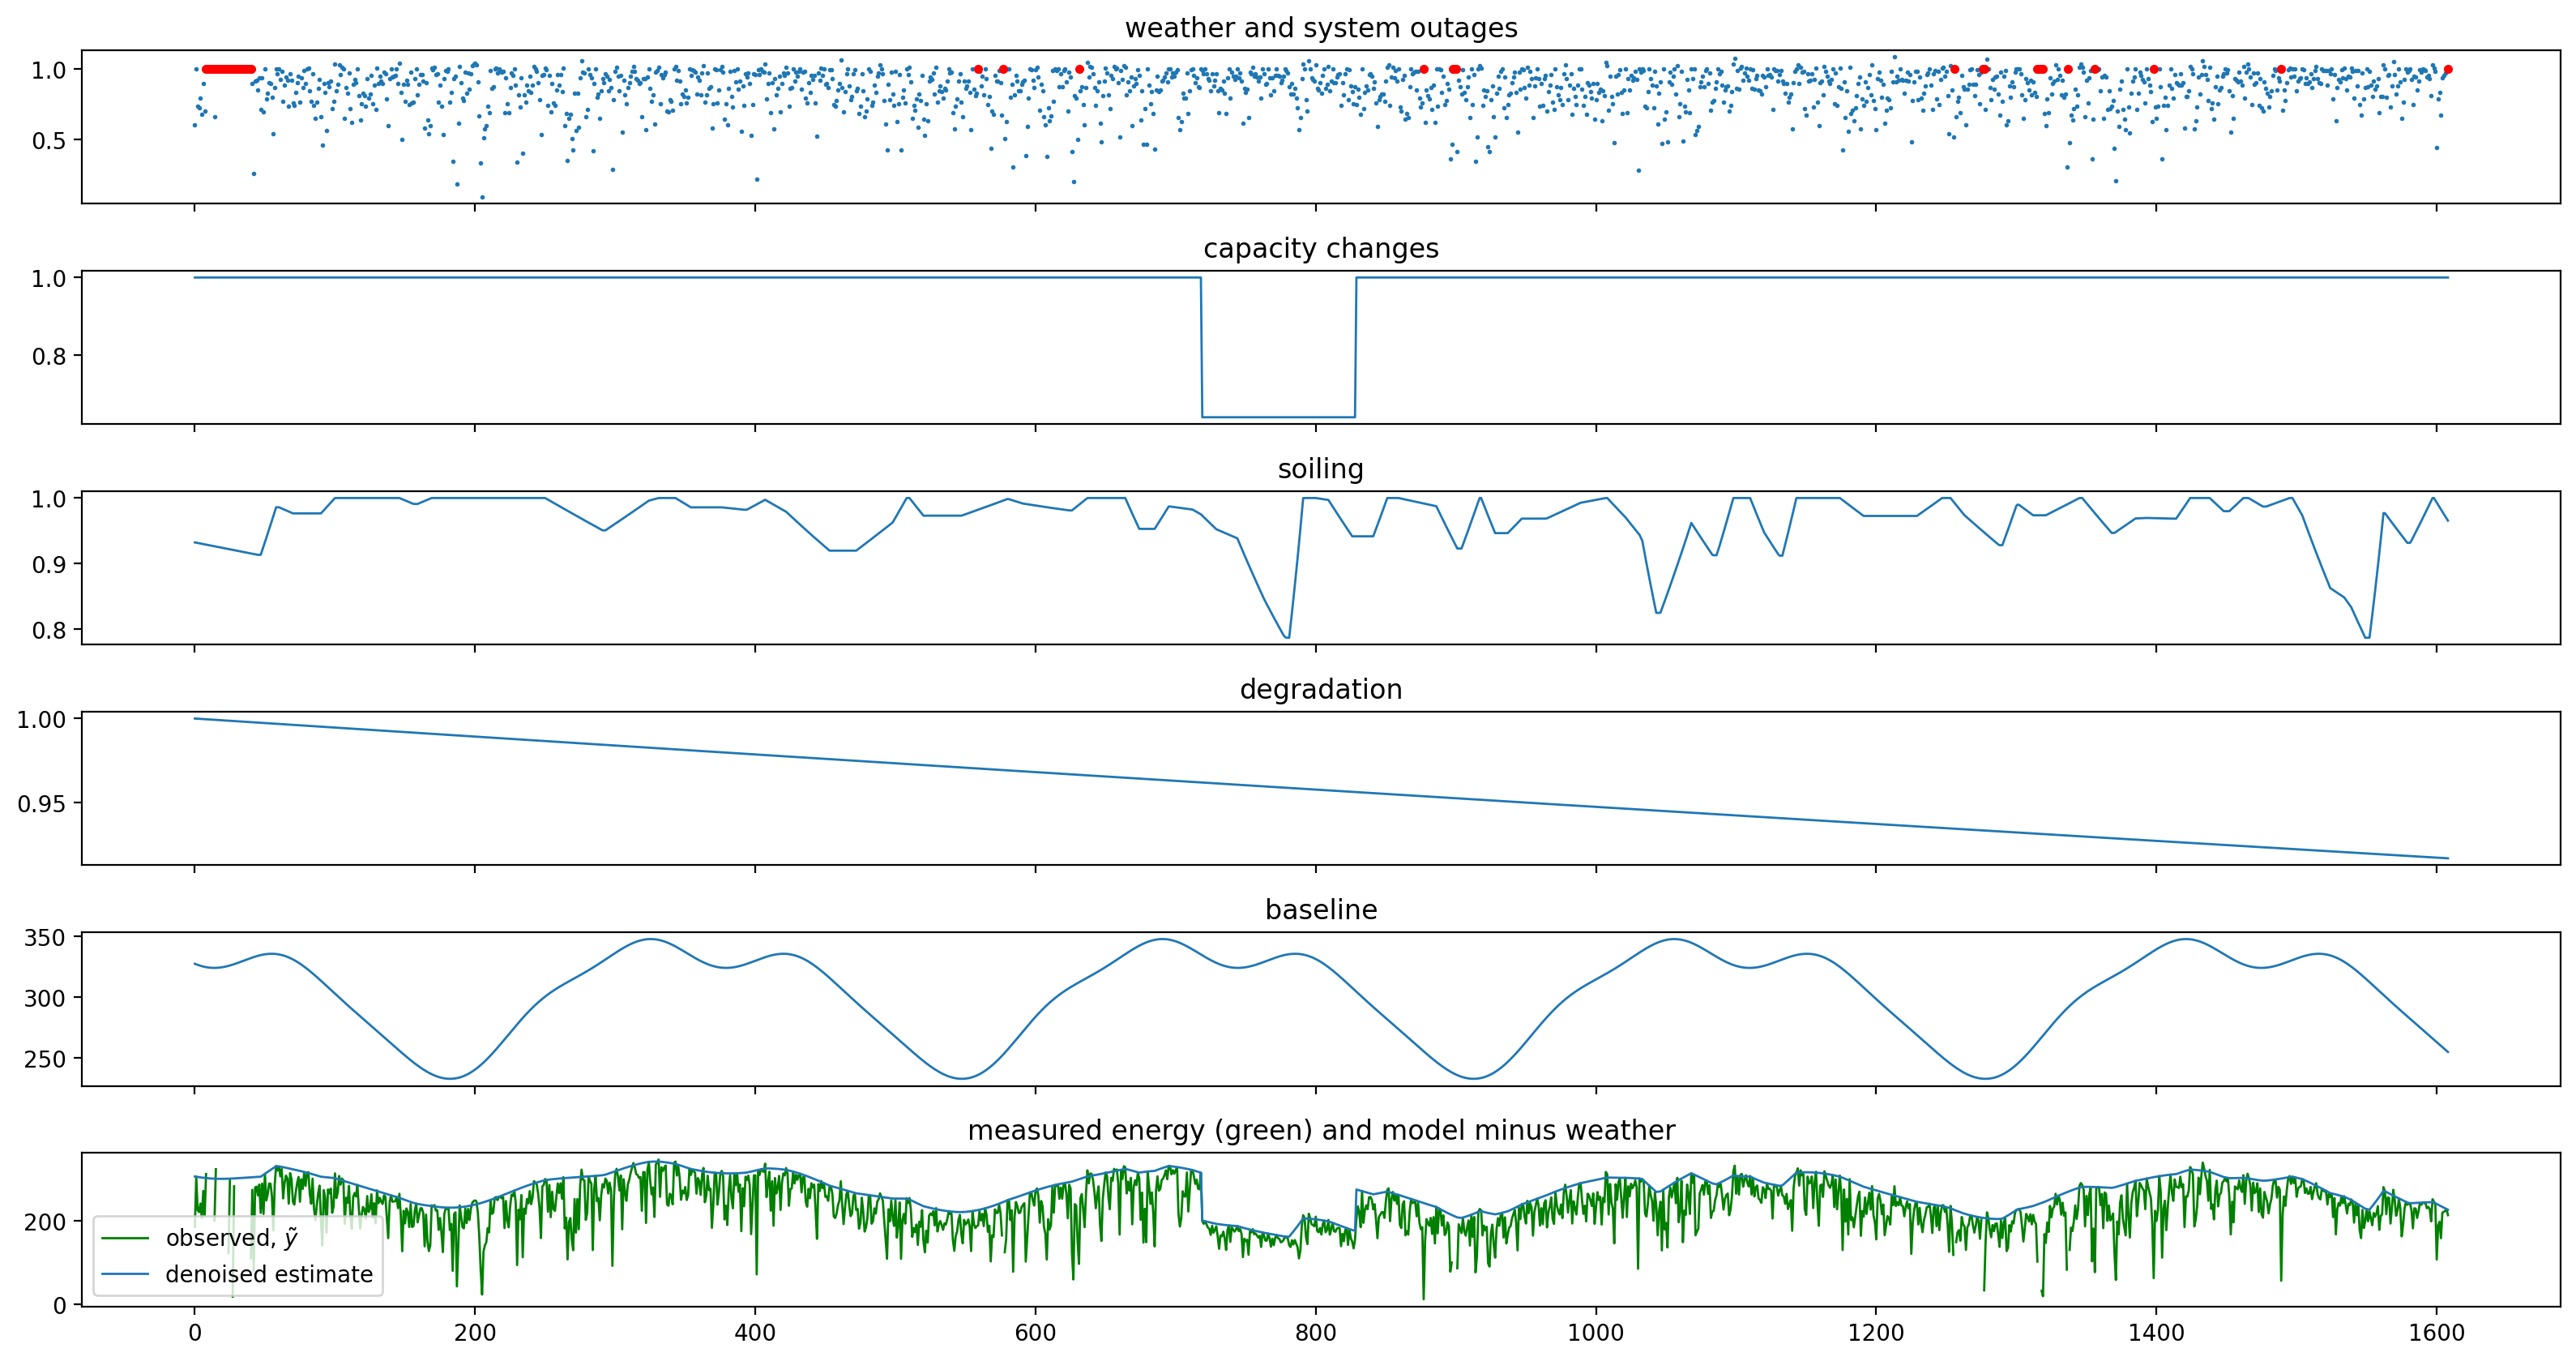

In [28]:
dh_2105.loss_analysis.plot_decomposition();